In [5]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
warnings.filterwarnings('ignore')

In [2]:
# read data from ./data/raw folder
df = pd.read_csv(os.path.join(os.getcwd(), os.pardir, 'data', 'raw', 'ACME-HappinessSurvey2020.csv'))

In [6]:
# Build a decision tree that predicts Y based on X1, X2, X3, X4, X5, X6
y = df['Y']
X = df.drop(['Y'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.6153846153846154


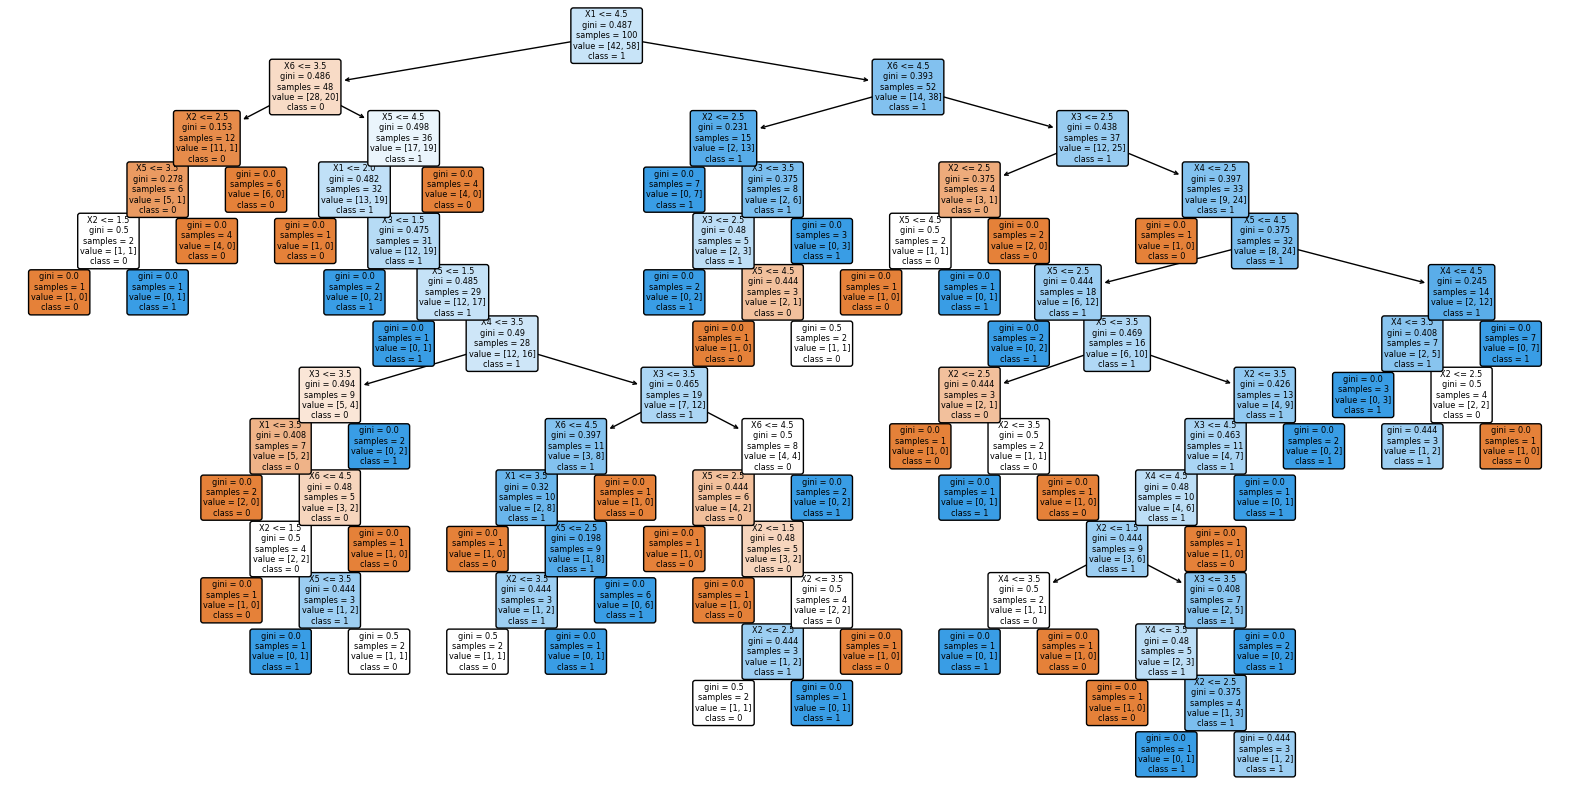

In [7]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

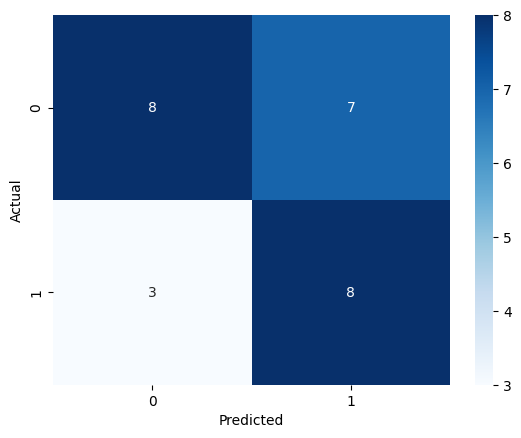

In [8]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

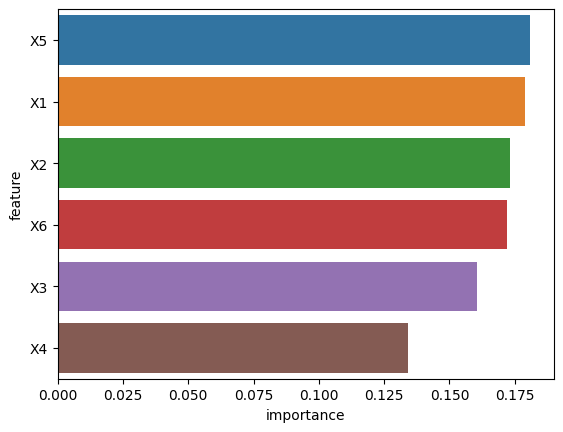

In [9]:
# Plot the feature importance
importance = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_})
importance = importance.sort_values('importance', ascending=False)
sns.barplot(x='importance', y='feature', data=importance)
plt.show()

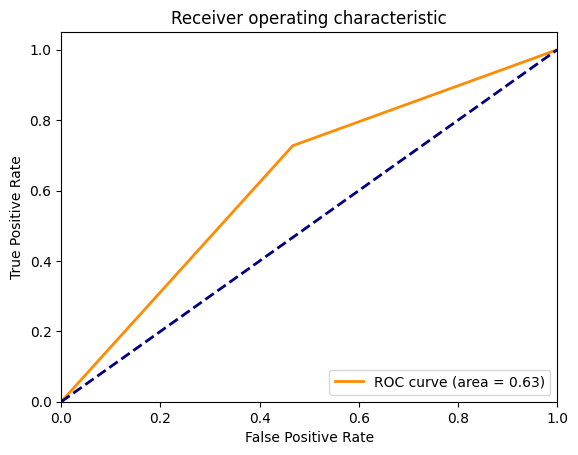

In [10]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


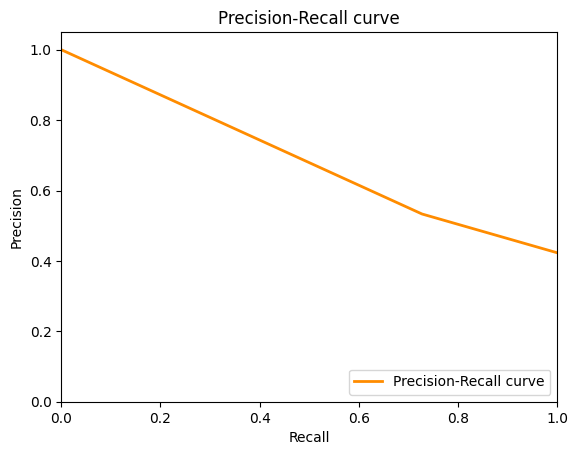

In [11]:
# Plot the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange',
            lw=lw, label='Precision-Recall curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()
